### Anaysis of eurovoc matching with text after completing definitions with GPT-3


In [26]:
%run 0_base.ipynb

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [27]:
df = pd.read_pickle("/home/cellar_seta/notebooks/correct_feedbacks/output/corrected_feedback.pkl")
print("Total number of feedbacks: ", len(df))
df.head()


Total number of feedbacks:  173


document_id                                      document_text  \
10  KJNA31327ENN  socrates social multi-criteria assessment of e...   
14  KJNA31329ENN  this report presents an assessment of european...   
15  KJNA31334ENN  the high performance liquid chromatography hpl...   
16  KJNA31346ENN  this joint research centre jrc technical repor...   
18  KJNA31331ENN  this report documents the criteria proposed to...   

                               cellar_id  \
10  90d83990-7b6b-11ed-9887-01aa75ed71a1   
14  8ec8609d-7c39-11ed-9887-01aa75ed71a1   
15  a94f0657-7c36-11ed-9887-01aa75ed71a1   
16  8ba3bd75-7c38-11ed-9887-01aa75ed71a1   
18  24ec839c-7f4e-11ed-9887-01aa75ed71a1   

                            selected_eurovoc_concepts  \
10          [1835, 1894, 1895, 2451, 688, 7131, 8466]   
14    [134, 2530, 2680, 2825, 3144, 3535, 4628, 5585]   
15   [2395, 2896, 2919, 2924, 3660, 4426, 5188, 5742]   
16  [1759, 1854, 2479, 2896, 3885, 4635, 4636, 589...   
18               [1534, 2530, 2538, 2896, 3144, 3535]   

    manualy_added_eurovoc_concepts  
10                          [5311]  
14                     [5742, 602]  
15                              []  
16                              []  
18  [1278, c_838aa925, c_98d1408a]

In [28]:
token_json, api_url = seta_api_utils.init_seta_api(force=True)
# using get_similar_docs_by_content() get similar documents for each document
date_range = ["gte:2600-01-01"]

## Stats
### 1 Level Eurovoc concepts Match

In [29]:
# feedback_eurovoc_concepts = select_eurovoc_concepts + manually added eurovoc concepts
df['feedback_eurovoc_concepts'] = df['selected_eurovoc_concepts'] + df['manualy_added_eurovoc_concepts']

In [30]:
df.head()

document_id                                      document_text  \
10  KJNA31327ENN  socrates social multi-criteria assessment of e...   
14  KJNA31329ENN  this report presents an assessment of european...   
15  KJNA31334ENN  the high performance liquid chromatography hpl...   
16  KJNA31346ENN  this joint research centre jrc technical repor...   
18  KJNA31331ENN  this report documents the criteria proposed to...   

                               cellar_id  \
10  90d83990-7b6b-11ed-9887-01aa75ed71a1   
14  8ec8609d-7c39-11ed-9887-01aa75ed71a1   
15  a94f0657-7c36-11ed-9887-01aa75ed71a1   
16  8ba3bd75-7c38-11ed-9887-01aa75ed71a1   
18  24ec839c-7f4e-11ed-9887-01aa75ed71a1   

                            selected_eurovoc_concepts  \
10          [1835, 1894, 1895, 2451, 688, 7131, 8466]   
14    [134, 2530, 2680, 2825, 3144, 3535, 4628, 5585]   
15   [2395, 2896, 2919, 2924, 3660, 4426, 5188, 5742]   
16  [1759, 1854, 2479, 2896, 3885, 4635, 4636, 589...   
18               [1534, 2530, 2538, 2896, 3144, 3535]   

    manualy_added_eurovoc_concepts  \
10                          [5311]   
14                     [5742, 602]   
15                              []   
16                              []   
18  [1278, c_838aa925, c_98d1408a]   

                            feedback_eurovoc_concepts  
10    [1835, 1894, 1895, 2451, 688, 7131, 8466, 5311]  
14  [134, 2530, 2680, 2825, 3144, 3535, 4628, 5585...  
15   [2395, 2896, 2919, 2924, 3660, 4426, 5188, 5742]  
16  [1759, 1854, 2479, 2896, 3885, 4635, 4636, 589...  
18  [1534, 2530, 2538, 2896, 3144, 3535, 1278, c_8...

In [31]:
#  for each concept in feedback_eurovoc_concepts, 
#      if concept is in matched_eurovoc_concepts, then add 1 to the count
#  percentage of concepts matched = count/len(feedback_eurovoc_concepts)

def get_matched_eurovoc_concepts_percentage(row):
    matched_eurovoc_concepts = set(row['feedback_eurovoc_concepts']).intersection(set(row['matched_eurovoc_concepts']))
    if len(row['feedback_eurovoc_concepts']) > 0:
        return len(matched_eurovoc_concepts)/len(row['feedback_eurovoc_concepts'])
    else:
        return 0

In [32]:
test = get_eurovoc_concepts_using_seta_text_similarity("algeria", 10, date_range)
print(test)

['1196', 'c_6e703074', '1658', '594', '891', '1125', '5617', '357', '1794', '5445']


In [33]:

from collections import defaultdict
n_concepts = [10, 20, 30, 40, 50]
results = defaultdict(float)
for n in n_concepts:
    df['matched_eurovoc_concepts'] = df.apply(lambda row: get_eurovoc_concepts_using_seta_text_similarity(row['document_text'], n, date_range), axis=1)
    df['matched_eurovoc_concepts_percentage'] = df.apply(lambda row: get_matched_eurovoc_concepts_percentage(row), axis=1)
    r = df['matched_eurovoc_concepts_percentage'].sum()/len(df)
    results[n] = r * 100
    print("Total percentage of concepts matched for n_concepts = {}: {}".format(n, r))

Total percentage of concepts matched for n_concepts = 10: 0.15836800482754237
Total percentage of concepts matched for n_concepts = 20: 0.23337199088644173
Total percentage of concepts matched for n_concepts = 30: 0.27710990839603555
Total percentage of concepts matched for n_concepts = 40: 0.31074485886624614
Total percentage of concepts matched for n_concepts = 50: 0.33947274626465374


Total percentage of concepts matched for n_concepts = 10: 0.16035025507568856
Total percentage of concepts matched for n_concepts = 20: 0.2259241641467075
Total percentage of concepts matched for n_concepts = 30: 0.26935763337497437
Total percentage of concepts matched for n_concepts = 40: 0.304673698170808
Total percentage of concepts matched for n_concepts = 50: 0.3290253901525578

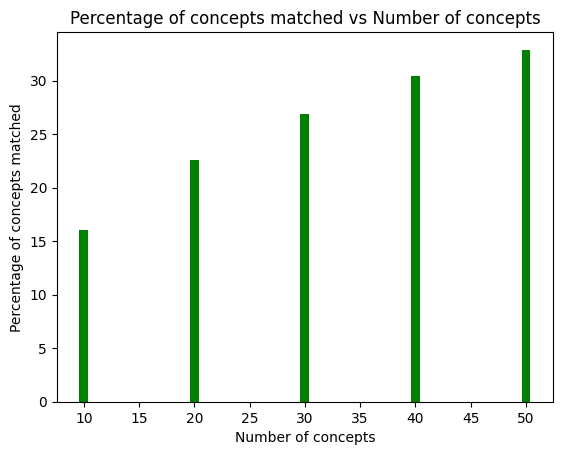

In [24]:
# disolay the results in a bar chart
import matplotlib.pyplot as plt
plt.bar(results.keys(), results.values(), color='g') 
plt.xlabel("Number of concepts")
plt.ylabel("Percentage of concepts matched")
plt.title("Percentage of concepts matched vs Number of concepts")
plt.show()

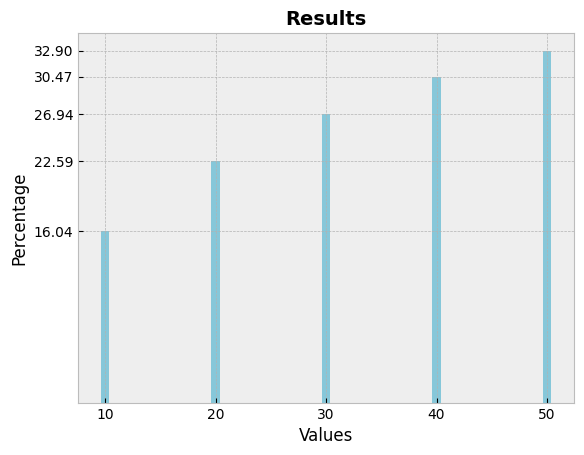

In [25]:
# Set the style
plt.style.use('bmh')

# Create a vertical bar chart
plt.bar(list(results.keys()), list(results.values()), color='#86C7D9')

# Add a title and axis labels
plt.title('Results', fontsize=14, fontweight='bold')
plt.xlabel('Values', fontsize=12)
plt.xticks(list(results.keys()))
plt.ylabel('Percentage', fontsize=12)
plt.yticks(list(results.values()))

# Add labels to the bars
# for i, v in enumerate(results_tmp.values()):
#     plt.text(i + 9.5, v + 1, str(round(v, 2)) + '%', color='#1C1C1C', fontweight='bold')

# Show the plot
plt.show()